
## Title: Classifying the Stage of Heart Disease of Patient's from Cleveland based on Age, Resting Blood Pressure, Cholesterol, and Max Heart Rate.

## Background Information

Heart disease is one of the leading causes of death across the United States of America that is caused by a wide variety of factors. Common heart diseases include coronary heart disease, arrhythmias, strokes, etc. Throughout the 21st century, medical professionals have deduced how certain factors may give leeway to one having a certain type of heart disease and the extent of its danger to the human body (Centers for Disease Control and Prevention, 2023). In this project, we will try to predict the severity of a patient's heart disease given the relevant predictors. The dataset being used is a collection of patients from Cleveland, Ohio, all of whom were suspected to have heart disease. The dataset contains 14 attributes that could contribute to the severity of one’s heart disease. Of the 14, we hope to train a model that is able to classify these stages given some attributes.

**Research Question: How can age, resting bp, chol, and chest pain be used to determine the stage of heart disease of patients from Cleveland?**

In [1]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘GGally’ was built under R version 4.3.2”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      

In [2]:
# Reading our dataset
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                           col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
                           col_types = list("d", "f", "f", "d", "d","f", "f", "d", "f", "d", "d", "f", "f", "d")) 
# cleveland_data

The num column represents the degree of artery blockage. We replace num with a column called "stage" that buckets these values into categories "Healthy" (0), "Early" (1), "Medium" (2-3), and "Late" (4-5). This will be our labels column. 

In [3]:
set.seed(69)

cleveland_data <- cleveland_data |> 
    mutate(stage = cut(num, breaks=c(-Inf,0,2,5), labels=c("Healthy","Moderate","Severe"))) 

# Splitting into training and testing sets 
split <- initial_split(cleveland_data, prop=0.75, strata = stage)
data_training <- training(split)
data_testing <- testing(split)

head(data_training)

age sex cp  trestbps chol fbs restecg thalach exang oldpeak slope ca  thal
1 63  1.0 1.0 145      233  1.0 2.0     150     0.0   2.3     3     0.0 6.0 
2 37  1.0 3.0 130      250  0.0 0.0     187     0.0   3.5     3     0.0 3.0 
3 57  0.0 4.0 120      354  0.0 0.0     163     1.0   0.6     1     0.0 3.0 
4 57  1.0 4.0 140      192  0.0 0.0     148     0.0   0.4     2     0.0 6.0 
5 44  1.0 2.0 120      263  0.0 0.0     173     0.0   0.0     1     0.0 7.0 
6 52  1.0 3.0 172      199  1.0 0.0     162     0.0   0.5     1     0.0 7.0 
  num stage  
1 0   Healthy
2 0   Healthy
3 0   Healthy
4 0   Healthy
5 0   Healthy
6 0   Healthy

In [4]:
# Find the average of each continuous variable to find potential patterns
training_summary <- data_training |>
    select(age, trestbps,chol,thalach,oldpeak,stage) |>
    group_by(stage) |>
    summarize(across(age:oldpeak, mean)) 
training_summary

stage    age      trestbps chol     thalach  oldpeak  
1 Healthy  52.90244 129.2846 240.8130 157.8618 0.5902439
2 Moderate 57.16176 134.1618 253.8676 143.2353 1.3573529
3 Severe   57.19444 135.2500 250.2222 137.7222 2.0472222

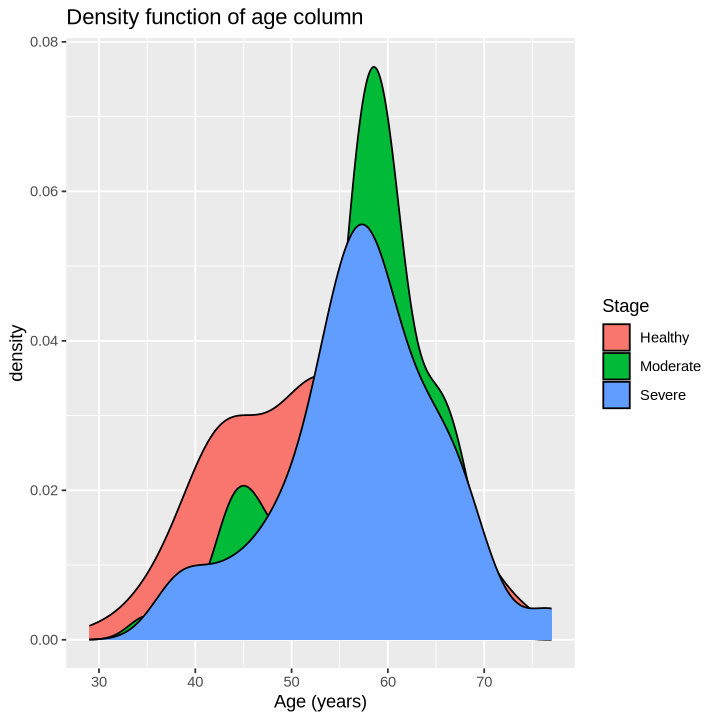

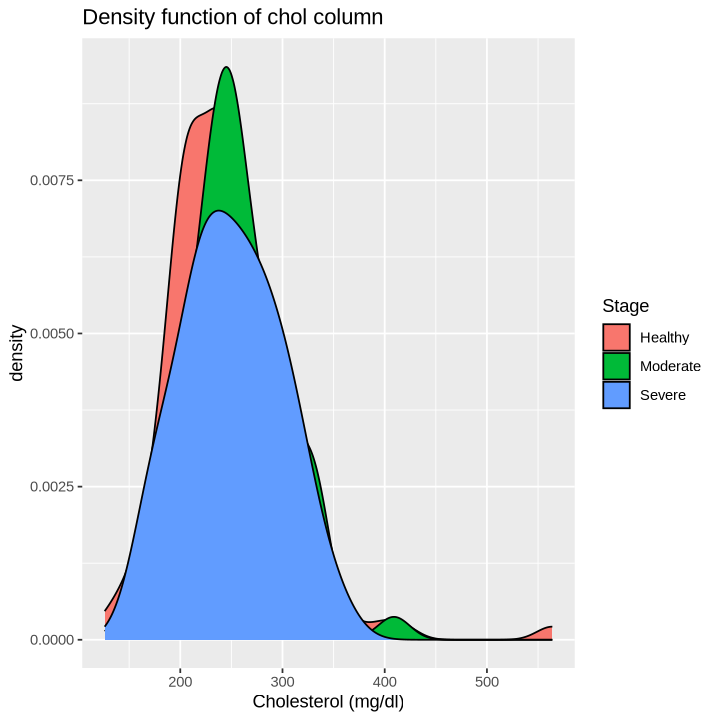

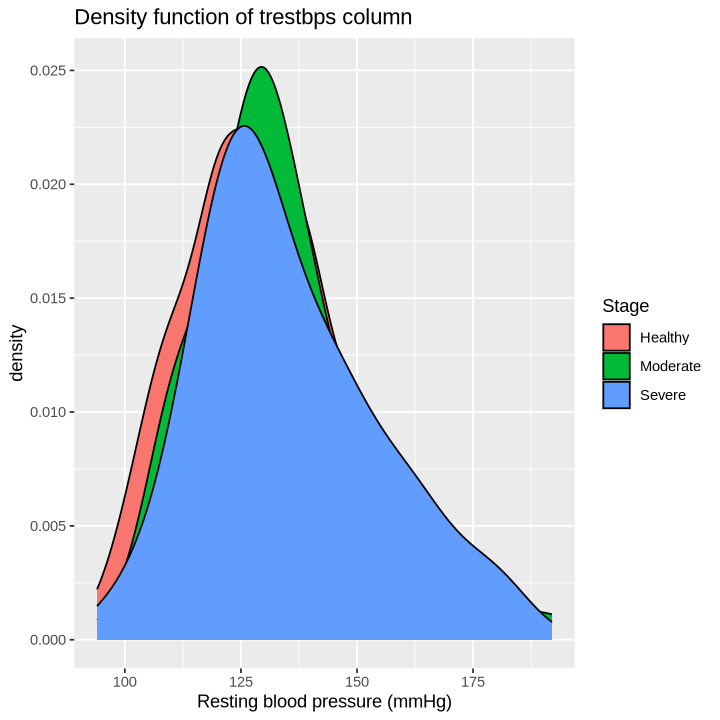

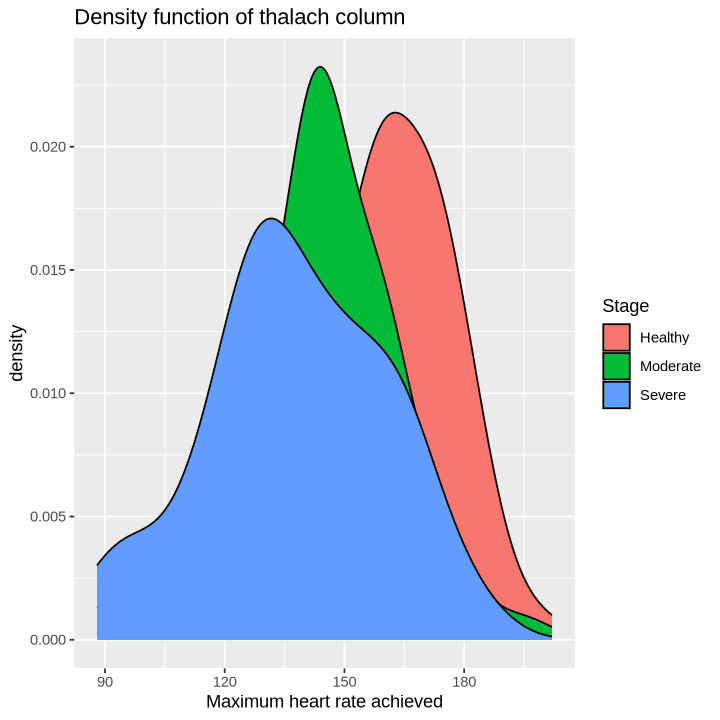

In [5]:
options(repr.plot.width = 6, repr.plot.height = 6)

# Density plots to visualize the distribution of classes which each variable
age <- ggplot(data_training, aes(x = age, fill = stage)) + 
    geom_density() +
    ggtitle("Density function of age column") +
    labs(x = "Age (years)", fill="Stage")
age

chol <- ggplot(data_training, aes(x = chol, fill = stage)) + 
    geom_density() +
    ggtitle("Density function of chol column") +
    labs(x = "Cholesterol (mg/dl)", fill="Stage")
chol

tresbps <- ggplot(data_training, aes(x = trestbps, fill = stage)) + 
    geom_density() +
    ggtitle("Density function of trestbps column") +
    labs(x = "Resting blood pressure (mmHg)", fill = "Stage")
tresbps

thalach <- ggplot(data_training, aes(x = thalach, fill = stage)) + 
    geom_density() +
    ggtitle("Density function of thalach column") +
    labs(x = "Maximum heart rate achieved", fill = "Stage")
thalach


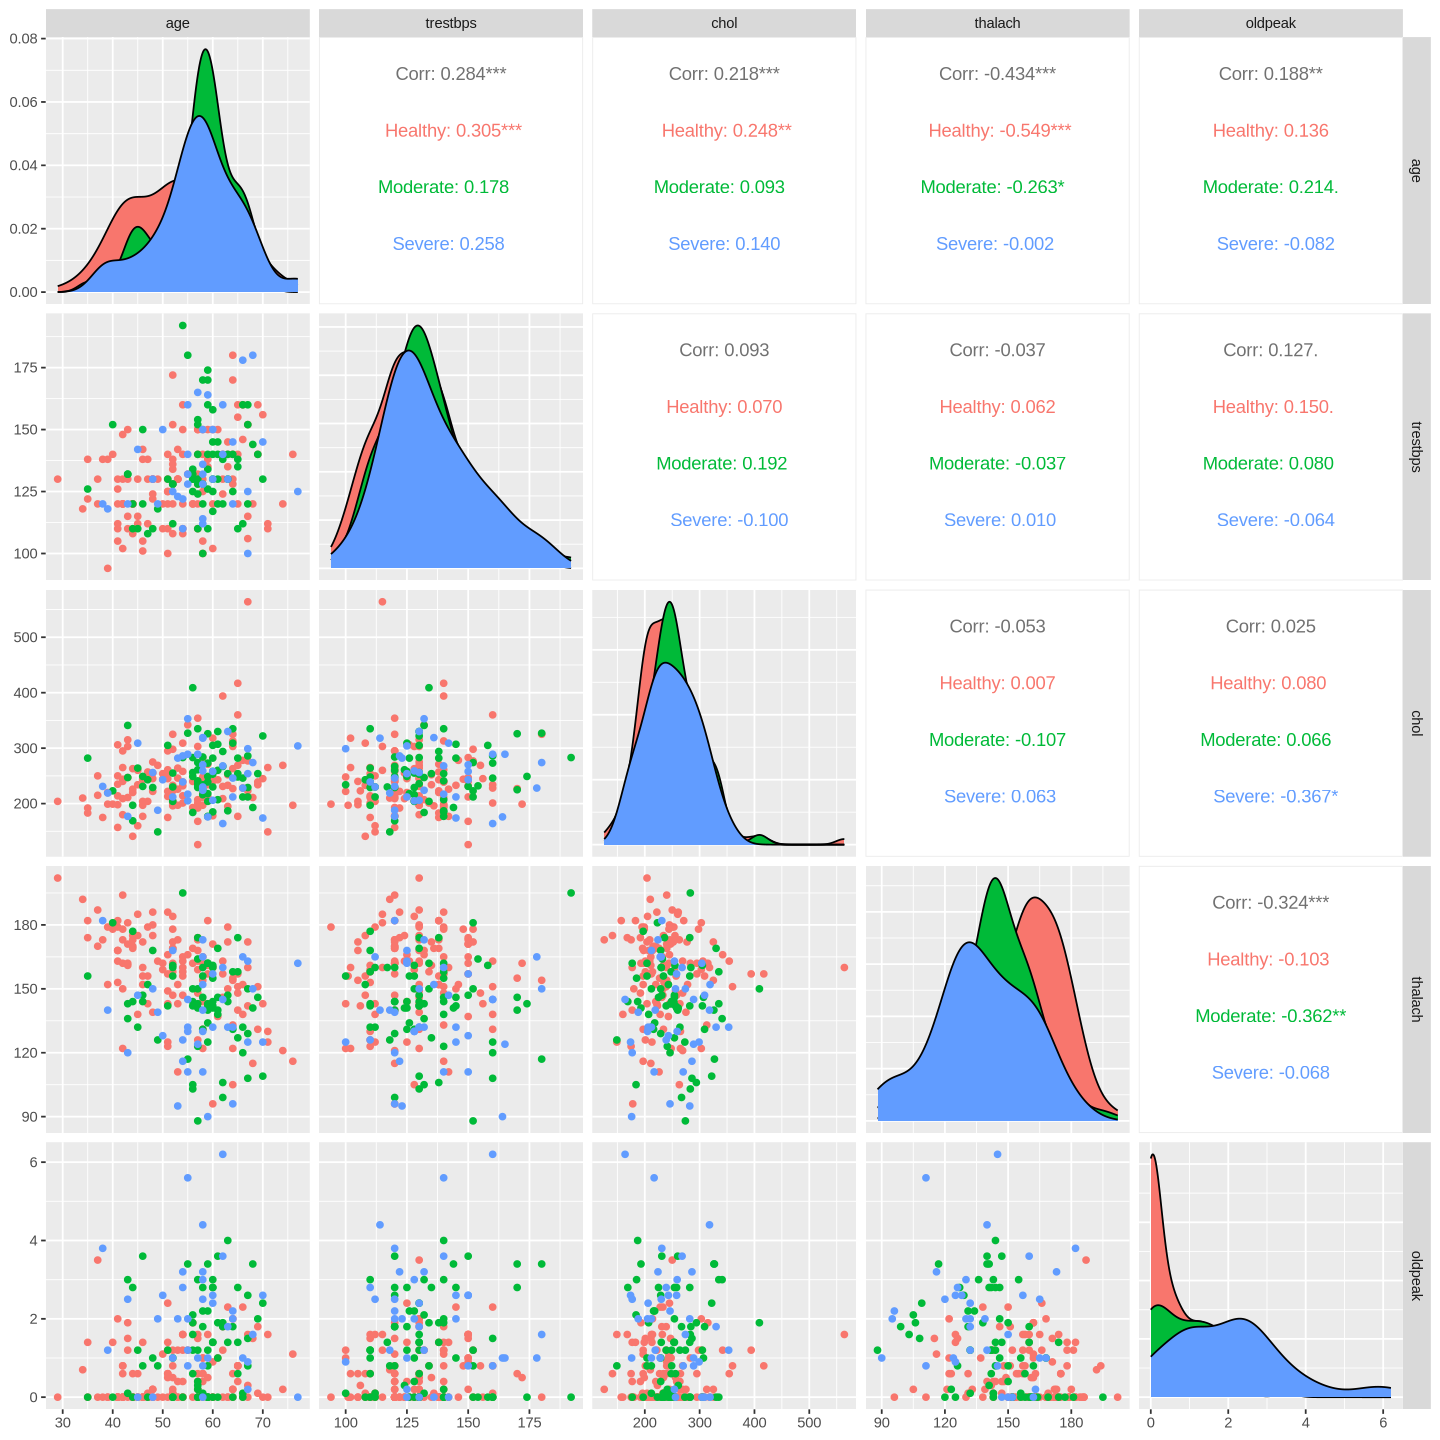

In [6]:
options(repr.plot.width = 12, repr.plot.height = 12)

#ggpairs to compare each potential predictor
data_training |> select(age, trestbps,chol,thalach,oldpeak,stage) |> ggpairs(columns=1:5,ggplot2::aes(colour = stage))

Below we count the number of NA values and determine how balanced the classes are.

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal num
1 0   0   0  0        0    0   0       0       0     0       0     0  0    0  
  stage
1 0

stage    count
1 Healthy  123  
2 Moderate  68  
3 Severe    36

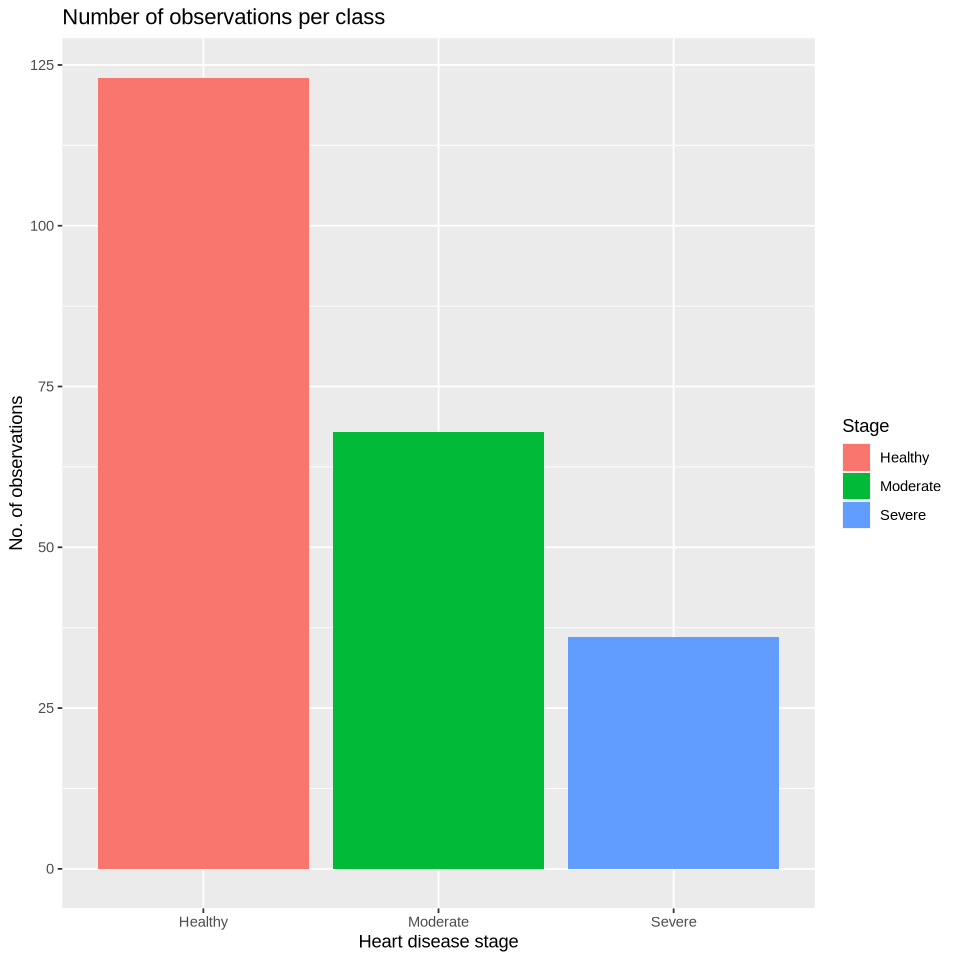

In [7]:
options(repr.plot.width = 8, repr.plot.height = 8)


# Count null values
nulls <- data_training |> map_df(\(c) sum(is.na(c)))
nulls

# Count and visualize number of classes
balance <- data_training |> group_by(stage) |> summarize(count = n()) 
balance

balance_plot <- ggplot(balance,aes(x = stage, y = count, fill = stage)) +
    geom_bar(stat = "identity") +
    ggtitle("Number of observations per class") +
    labs(x = "Heart disease stage", y = "No. of observations", fill = "Stage")
balance_plot

Thankfully, there are no NA values in our data so cleaning was successful. However, there is a severe imbalance in classes. There are significantly more observations classified as "Healthy" than the other 3 classes. This will require upsampling.

## Methods:
Initially, we read all our data and ensure that each column is the appropriate type. Since we will be using classification algorithms, we focus on continuous variables and averaged each variable based on its stage to uncover any potential trends. We then split the data into our training and testing splits using the stage column as our strata.

Using the training data, we extracted some of properties such as the number of null values and the balance of classes. Although there are no null values, there is quite an imbalance in classes which will require upsampling.

To decide on our predictors, we used density plots to visualize the distribution of the classes to the predictor's value. We then used scatterplots to determine any distinct class regions between predictors. Based on our visualizations we found that age, resting blood pressure, cholesterol, and max heart rate contained considerable class regions when colored based on stage. Therefore, we choose the aforementioned as our predictors.

## Expected Outcomes and significance 

We expect to find an increase in heart disease risk with increasing age, resting blood pressure, max heart rate, and cholesterol levels. In general, susceptibility to heart disease increases with age (Rodgers et al., 2019) and increasing cholesterol levels (Jung et al., 2022). 

If a correlation is established it might be possible to diagnose patients with heart disease earlier, thus allowing earlier action. This could lead to autonomous diagnoses of disease, where people can run tests for themselves to figure out if they are more at risk of heart disease, without the presence of a doctor. Early intervention could lead to earlier prevention and treatment. Additionally, having a second automated process to double check diagnoses can help catch missed cases. All of these outcomes may save lives.

Some future questions include:
- How can we use commonly accessible factors to ensure earlier detection of late stage severe cases of heart disease?
- Which factors are most important when looking into the correlation between heart disease? 


# Bibliography 

Centers for Disease Control and Prevention. (2023, May 15). Heart disease facts. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/facts.htm 

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.